# Financial econometric analysis 

# Introduction

The goal of the project is to import a dataset containing financial information from different companies. The data will be cleaned with respect to solving missing values and applying econometric data manipulation. Afterwards we conduct an OLS regression analysis to find which variables significantly affects sales and how. 
The dataset contains the following variables: 

| Variable | Meaning |
| --- | --- |
| AP | Accounts payable |
| AT | Assets |
| BV | Book value |
| COGS | Cost of goods sold |
| EMP | The number of employees |
| IBE | Income before extraordinary items |
| OCF | Net operating activities reported in the cash flow statements |
| PPE | Property plant and equipment |
| REC | Recivables |
| SALE | Revenue |
| XOPR | Operating expenses |
| MV | Market value |


# Import packages

In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.outliers_influence as sm_influence
from patsy import dmatrices
import statsmodels.api as sm_non_formula
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import requests


# Read data

**Import data .CSV file**

In [2]:
data_url = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2020-ku-analytica/master/dataproject/Financials.csv'
financials = pd.read_csv(data_url)

Print 20 first rows to get overview of data structure

In [3]:
print(financials.head(20))

    gvkey  datadate   tic        AP         AT        BV       COGS      EMP  \
0    1004  20130531   AIR   149.300   2136.900   918.600   1714.500    6.300   
1    1004  20140531   AIR   171.100   2199.500   999.500   1581.400    5.800   
2    1004  20150531   AIR   142.300   1515.000   845.100   1342.700    4.850   
3    1004  20160531   AIR   163.400   1442.100   865.800   1354.900    4.700   
4    1004  20170531   AIR   177.400   1504.100   914.200   1422.700    4.600   
5    1045  20121231   AAL  1244.000  23510.000 -7987.000  20529.000   77.750   
6    1045  20131231   AAL  1368.000  42278.000 -2731.000  19084.000  110.400   
7    1045  20141231   AAL  1377.000  43771.000  2021.000  29511.000  113.300   
8    1045  20151231   AAL  1563.000  48415.000  5635.000  25416.000  118.500   
9    1045  20161231   AAL  1592.000  51274.000  3785.000  25695.000  122.300   
10   1050  20121231  CECE    11.098     94.104    61.994     91.690    0.452   
11   1050  20131231  CECE    23.108    3

# Investigate and clean data

Identify missing values/null values. Sum over both columns and rows (axis 0 and 1)

In [4]:
print(financials.isnull().sum().head(20))
print(financials.isnull().sum(axis=1).head(20))

gvkey              0
datadate           0
tic               38
AP             12693
AT              9482
BV             14858
COGS           14531
EMP            13105
IBE             9607
OCF            14702
PPE            17100
REC            14634
SALE            9618
XOPR           14536
MV             17492
2_digit_sic        0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    3
16    7
17    7
18    3
19    7
dtype: int64


Create new column in dataframe containing sum of missing values, and sort financial data descending after new NumNulls column

In [5]:
financials['NumNull']=financials.isnull().sum(axis=1)
financials = financials.sort_values('NumNull', ascending=False)
print(financials.head(20))

        gvkey  datadate  tic  AP  AT  BV  COGS  EMP  IBE  OCF  PPE  REC  SALE  \
36540  177391  20141231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35569  176324  20141231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35567  176324  20121231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
37047  178034  20141231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
37045  178034  20121231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
36695  177503  20131231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
36696  177503  20141231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35451  176211  20131231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35452  176211  20141231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35453  176212  20121231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35454  176212  20131231  NaN NaN NaN NaN   NaN  NaN  NaN  NaN  NaN  NaN   NaN   
35455  176212  20141231  NaN

We drop IBE, OCF and PPE as they seem irrelevant and contain a significant number of missing values.
Also drop all rows with more than 3 missing values. 

In [6]:
financials = financials.drop(['IBE', 'OCF', 'PPE'], axis=1)
financials.dropna(thresh=13, inplace=True)
financials.dropna(subset=['SALE'], inplace=True)
print(financials.head(20))
print(financials.isnull().sum())

        gvkey  datadate    tic        AP         AT        BV      COGS  \
25116  107629  20161231  3NODB  1218.840   1367.985   140.580     2.386   
26420  119414  20170930   CFFN  5309.868   9192.916  1368.313   117.804   
9975    18035  20161231   EXSR  1943.410   2179.401   189.172     0.249   
8835    16957  20140930   HARL   502.251    791.353    63.162    11.041   
9974    18035  20151231   EXSR  1838.977   2062.508   173.107    -1.429   
9972    18035  20141231   EXSR  1668.399   1887.679   160.074     2.511   
14820   23060  20161231   BHWB   572.366    665.728    49.550     4.521   
26605  121073  20141231   AMBZ  1364.444   1535.538   118.891     2.430   
26846  122954  20121231  9769B   118.488  17937.257  6136.828  5968.469   
26607  121073  20151231   AMBZ  1524.136   1671.257   131.383     1.501   
25114  107629  20151231  3NODB  1205.246   1352.286   136.524     3.219   
9910    17987  20121231   ESBK   409.565    536.936    42.795     6.359   
9135    17222  20121231  

From tables above, we see that data is already more clean. Number of variables with significant number of missing values are lower. For variables AP, REC and BV we fill out missing values with total column means.

In [7]:
financials.AP.fillna(financials.AP.mean(), inplace=True)
financials.REC.fillna(financials.REC.mean(), inplace=True)
financials.BV.fillna(financials.BV.mean(), inplace=True)

print(financials.isnull().sum())

gvkey             0
datadate          0
tic               0
AP                0
AT                0
BV                0
COGS              0
EMP            1371
REC               0
SALE              0
XOPR              0
MV             4873
2_digit_sic       0
NumNull           0
dtype: int64


At last we replace missing MV and EMP values with industry means (based on sic code)

In [8]:
financials.MV.fillna(financials.groupby('2_digit_sic')['MV'].transform("mean"), inplace=True)
financials.EMP.fillna(financials.groupby('2_digit_sic')['EMP'].transform("mean"), inplace=True)
print(financials.isnull().sum())

gvkey          0
datadate       0
tic            0
AP             0
AT             0
BV             0
COGS           0
EMP            0
REC            0
SALE           0
XOPR           0
MV             0
2_digit_sic    0
NumNull        0
dtype: int64


We have now cleaned data such that **there are no missing values**. We print descriptive statistics to get an overview of each variable.

In [9]:
print(financials.describe())

               gvkey      datadate            AP            AT             BV  \
count   28679.000000  2.867900e+04  2.867900e+04  2.867900e+04   28679.000000   
mean    82894.917501  2.014338e+07  4.553832e+03  1.625748e+04    2711.770446   
std     76067.848835  1.416421e+04  5.376664e+04  1.216392e+05   12544.056063   
min      1004.000000  2.012113e+07  0.000000e+00  0.000000e+00 -132599.000000   
25%     17131.500000  2.013123e+07  2.183000e+00  6.380450e+01      17.040000   
50%     60972.000000  2.014123e+07  2.729000e+01  6.296590e+02     179.086000   
75%    162528.000000  2.015123e+07  2.822010e+02  3.632374e+03    1082.396000   
max    318815.000000  2.017093e+07  1.709017e+06  3.287968e+06  284434.000000   

                COGS           EMP           REC           SALE  \
count   28679.000000  28679.000000  2.867900e+04   28679.000000   
mean     2854.858348     11.565645  5.344330e+03    4284.453183   
std     14384.580698     47.652655  6.449719e+04   18677.014588   
mi

From the descriptive statistics we see that a lot of the variables contain negative values. For a number of variables this does not make any sense, thus we clean out negative values in XOPR, COGS, SALE, BV and EMP.

In [10]:
financials = financials[financials.XOPR > 0]
financials = financials[financials.COGS > 0]
financials = financials[financials.SALE > 0]
financials = financials[financials.BV > 0]
financials = financials[financials.EMP > 0]

print(financials.describe())

               gvkey      datadate            AP            AT             BV  \
count   22717.000000  2.271700e+04  2.271700e+04  2.271700e+04   22717.000000   
mean    79820.421843  2.014341e+07  5.718313e+03  1.904609e+04    3466.732796   
std     75428.677692  1.422304e+04  6.035161e+04  1.243067e+05   13778.660310   
min      1004.000000  2.012113e+07  0.000000e+00  2.000000e-03       0.002000   
25%     15334.000000  2.013123e+07  5.950000e+00  1.830270e+02      66.202000   
50%     31358.000000  2.014123e+07  5.820000e+01  1.016494e+03     329.258000   
75%    158053.000000  2.015123e+07  4.432000e+02  4.996427e+03    1543.780000   
max    318815.000000  2.017093e+07  1.709017e+06  2.692538e+06  284434.000000   

                COGS           EMP           REC           SALE  \
count   22717.000000  22717.000000  2.271700e+04   22717.000000   
mean     3468.468616     13.678329  5.634741e+03    5186.278388   
std     16014.760246     52.222003  5.023828e+04   20696.732755   
mi

We have now cleaned data such that there are no negative values where those do not make sense. Since we are going to use the data for OLS regresionnal analysis, we are also interested in varibales with significant degree of skewness. To handle this for COGS, we normalize by dividing difference to mean with max difference. This yields values only between 0 and 1

In [11]:
financials.COGS = (financials.COGS - financials.COGS.min())/(financials.COGS.max() - financials.COGS.min())

print(financials.describe())

               gvkey      datadate            AP            AT             BV  \
count   22717.000000  2.271700e+04  2.271700e+04  2.271700e+04   22717.000000   
mean    79820.421843  2.014341e+07  5.718313e+03  1.904609e+04    3466.732796   
std     75428.677692  1.422304e+04  6.035161e+04  1.243067e+05   13778.660310   
min      1004.000000  2.012113e+07  0.000000e+00  2.000000e-03       0.002000   
25%     15334.000000  2.013123e+07  5.950000e+00  1.830270e+02      66.202000   
50%     31358.000000  2.014123e+07  5.820000e+01  1.016494e+03     329.258000   
75%    158053.000000  2.015123e+07  4.432000e+02  4.996427e+03    1543.780000   
max    318815.000000  2.017093e+07  1.709017e+06  2.692538e+06  284434.000000   

               COGS           EMP           REC           SALE           XOPR  \
count  22717.000000  22717.000000  2.271700e+04   22717.000000   22717.000000   
mean       0.007960     13.678329  5.634741e+03    5186.278388    4196.117019   
std        0.036754     52.

In [12]:
#financials['Binned_SALE']=pd.qcut(financials.SALE, 10, labels=False)
#print(financials.describe())

To make sure data is clean we print types and make sure everything is as expected. When printing types, we find that our datadate is an integer. We change this to the proper datetime type. 

In [13]:
print(financials.dtypes)
financials.datadate = pd.to_datetime(financials.datadate, format='%Y%m%d')
print(financials.dtypes)

gvkey            int64
datadate         int64
tic             object
AP             float64
AT             float64
BV             float64
COGS           float64
EMP            float64
REC            float64
SALE           float64
XOPR           float64
MV             float64
2_digit_sic      int64
NumNull          int64
dtype: object
gvkey                   int64
datadate       datetime64[ns]
tic                    object
AP                    float64
AT                    float64
BV                    float64
COGS                  float64
EMP                   float64
REC                   float64
SALE                  float64
XOPR                  float64
MV                    float64
2_digit_sic             int64
NumNull                 int64
dtype: object


The last steps for cleaning data is creating a new Year valuable containing the year of the date. We then sort data according to gvkey and date. Data is now in order such that for each company, the date is ascending. 

In [14]:
financials['Year'] = financials.datadate.dt.year
financials.sort_values(by=['gvkey','datadate'], ascending=[True,True],inplace=True)

print(financials.head(20))

    gvkey   datadate   tic        AP         AT        BV      COGS  \
0    1004 2013-05-31   AIR   149.300   2136.900   918.600  0.003935   
1    1004 2014-05-31   AIR   171.100   2199.500   999.500  0.003629   
2    1004 2015-05-31   AIR   142.300   1515.000   845.100  0.003082   
3    1004 2016-05-31   AIR   163.400   1442.100   865.800  0.003110   
4    1004 2017-05-31   AIR   177.400   1504.100   914.200  0.003265   
7    1045 2014-12-31   AAL  1377.000  43771.000  2021.000  0.067728   
8    1045 2015-12-31   AAL  1563.000  48415.000  5635.000  0.058330   
9    1045 2016-12-31   AAL  1592.000  51274.000  3785.000  0.058971   
10   1050 2012-12-31  CECE    11.098     94.104    61.994  0.000210   
11   1050 2013-12-31  CECE    23.108    348.536   170.406  0.000309   
12   1050 2014-12-31  CECE    31.882    414.365   181.224  0.000404   
13   1050 2015-12-31  CECE    62.199    598.819   239.153  0.000585   
14   1050 2016-12-31  CECE    58.985    498.634   190.082  0.000638   
24   1

# Prepare data for OLS analysis

We are interested in doing OLS regression analysis on our data. For this matter we create new columns with lagged data, since this will be useful in our analysis later on.

In [15]:
financials['prevSALE'] = financials.SALE.shift(1)
financials['prevAT'] = financials.AT.shift(1)
financials['prevEMP'] = financials.EMP.shift(1)
financials['prevCOGS'] = financials.COGS.shift(1)
financials['prevREC'] = financials.REC.shift(1)
financials['prevXOPR'] = financials.XOPR.shift(1)
financials['prevAP'] = financials.AP.shift(1)

We now have to adress the issue of inconsistency in the data, meaning that not all companies have the same amount of years of data. Also the sihft variables do not take into acount, that the last observation for one company will be directly above the first observation of another company. We therefore have to make sure that the rows where these issues exist, will be dropped out of the data set.

In [16]:
financials = financials[((financials.Year-1 == financials.Year.shift(1)) & (financials.gvkey == financials.gvkey.shift(1)))]

The next step is to create scaled variables that we can use for the OLS regression. To improve consistency in the data we will try to begin by deflating all variables with assets, AT. Our model will analyse SALES as the dependent variable, and thus we deflate this by AT whilst all other variables are deflated by 'current' assets, prevAT. To do so we need to make sure that AT and prevAT are positive values. 

In [17]:
financials = financials [(financials.AT > 0)]
financials = financials [(financials.prevAT > 0)]

Which allows us to create all our scaled variables for the OLS regression analysis. A number of the variables have been manipulated with, and parts are commented out etc. The explanation for this will follow in the next section, but has to do with the specification of the model.

In [18]:
financials['Scaled_Sales'] = np.log(financials.SALE)
financials['Scaled_prevSales'] = np.log(financials.prevSALE)
financials['Scaled_Emp'] = np.log(financials.EMP)# / financials.prevAT)
financials['Scaled_EmpChange'] = (financials.EMP - financials.prevEMP) #/ financials.prevAT
financials['Scaled_COGS'] = np.log(financials.COGS)# / financials.prevAT)
financials['Scaled_COGSChange'] = (financials.COGS - financials.prevCOGS) #/ financials.prevAT
#financials['Scaled_Rec'] = financials.REC / financials.prevAT
financials['Scaled_RecChange'] = (financials.REC - financials.prevREC) #/ financials.prevAT
#financials['Scaled_XOPR'] = np.log(financials.XOPR / financials.prevAT)
#financials['Scaled_XOPRChange'] = (financials.XOPR - financials.prevXOPR) / financials.prevAT
#financials['Scaled_AP'] = financials.AP / financials.prevAT
#financials['Scaled_APChange'] = (financials.AP - financials.prevAP) #/ financials.prevAT
financials['BookToMarket'] = financials.BV / financials.MV

This improved it significantly, and we now continue to do the OLS regression

# OLS regression analysis

The first thing we do is to ensure that there are no missing values overall in the data set.

In [19]:
financials.dropna(inplace=True)

We start by running the full model without any commenting out in the scaled variables as introduced in the section above. From those results, we saw ceveral issues with the results. There were weird linear 'cut offs' in plotted residuals, insignificant varibales and other problems. We will not get further into the econometrics behind our decisions, but solely note below the steps we did to improve data performance in the OLS regression model: 

> 1. We start by taking the logarithm to SALES, since the distribution looks terrible.
> 1. We then change the deflation of the varibales. We no longer divide the varibales by AT and prevAT, but instead we take the logarithm to all varibales that are not change varibales except for BookToMarket, since there is no clear positive correlation between sales and BookToMarket values. 
> 1. We then remove REC, XOPR, XOPRChange, AP and APChange due to numerical problems as well as insignificancy. 
> 1. All of the steps above are incorporated in the specification of the scaled variables in section 5, which is why parts of the original full model are commented out. 

The corrected model yields nice results for both boxplots, violin plots and histogram of sales, which can be seen below.

<Figure size 432x288 with 0 Axes>

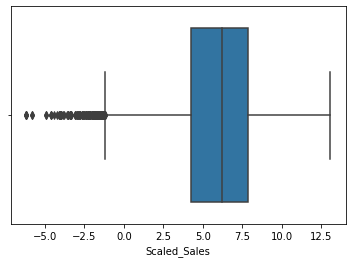

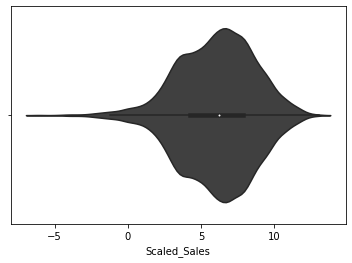

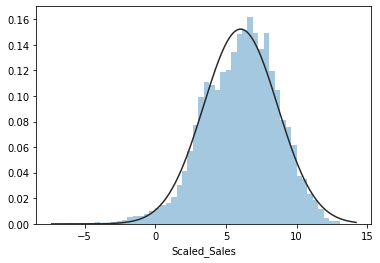

<Figure size 432x288 with 0 Axes>

In [20]:
sns.boxplot(x=financials.Scaled_Sales)
plt.figure()

sns.violinplot(x=financials.Scaled_Sales, color="0.25")
plt.figure()

sns.distplot(financials.Scaled_Sales, kde=False, fit=stats.norm)
plt.figure()

Below we run the OLS regression model with the final well specified model:

In [21]:
model_results = sm.ols(formula='Scaled_Sales ~ Scaled_prevSales + Scaled_Emp + Scaled_EmpChange + Scaled_COGS + Scaled_COGSChange + Scaled_RecChange + BookToMarket', data=financials).fit()
print(model_results.summary())


#model_results = sm.ols(formula='Scaled_Sales ~ Scaled_prevSales + Scaled_Emp + Scaled_EmpChange + Scaled_COGS + Scaled_COGSChange + Scaled_RecChange + BookToMarket', data=financials).fit()
#print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:           Scaled_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 8.825e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        14:08:29   Log-Likelihood:                -9666.7
No. Observations:               16946   AIC:                         1.935e+04
Df Residuals:                   16938   BIC:                         1.941e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8665      0.04

To get more robust test results, we create clustered standard errors for robust test results

In [22]:
robust_result = model_results.get_robustcov_results(cov_type='cluster', use_t=None, groups=financials['2_digit_sic'])
print(robust_result.summary())


#robust_result = model_results.get_robustcov_results(cov_type='cluster', use_t=None, groups=financials['2_digit_sic'])
#print(robust_result.summary())

                            OLS Regression Results                            
Dep. Variable:           Scaled_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 5.756e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):          1.22e-125
Time:                        14:08:29   Log-Likelihood:                -9666.7
No. Observations:               16946   AIC:                         1.935e+04
Df Residuals:                   16938   BIC:                         1.941e+04
Df Model:                           7                                         
Covariance Type:              cluster                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8665      0.38

**Heteroskedasticity test.** We analyse the potential heteroskedasticity problems graphically by plotting residulas againt predicted values.

<Figure size 432x288 with 0 Axes>

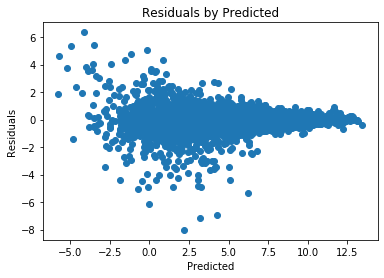

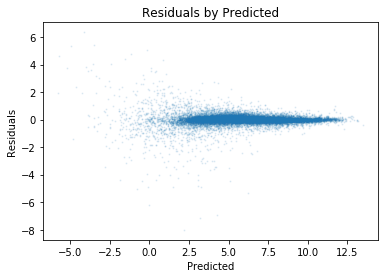

<Figure size 432x288 with 0 Axes>

In [23]:
financials["residuals"] = model_results.resid
financials["predicted"] = model_results.fittedvalues
plt.scatter(financials.predicted, financials.residuals)
plt.title("Residuals by Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.figure()

plt.scatter(financials.predicted, financials.residuals, s=1, alpha=0.1)
plt.title("Residuals by Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.figure()

Heteroskedasticity tests look as good as they get after respecifiying the model from the original full model to the final model as specified above. There might still be small potential issues regarding heteroskedasticity, which we could handle by performing a heteroskedasticity robust 'HC3' test. This should converge residuals into a more normal distribution:

                            OLS Regression Results                            
Dep. Variable:           Scaled_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.657e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        14:08:34   Log-Likelihood:                -9666.7
No. Observations:               16946   AIC:                         1.935e+04
Df Residuals:                   16938   BIC:                         1.941e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8665      0.14

<Figure size 432x288 with 0 Axes>

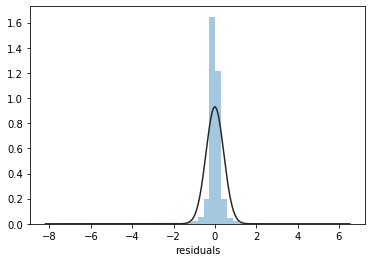

<Figure size 432x288 with 0 Axes>

In [24]:
robust_results = model_results.get_robustcov_results(cov_type='HC3', use_t=None)
print(robust_results.summary())

sns.distplot(financials.residuals, kde=False, fit=stats.norm)
plt.figure()

The last econometric test behind our decisions regarding the respecification of the original model is the VIF score test, telling us the degree of multicollinarity for adding additional varibales to the model. The classic rule of thumb is that VIF scores should not be above 5, unless a variable seems very like to affect the dependent varibale of the model. From the VIF score test we find, that only prevSales is significantly higher that 5, but cannot be omitted since the varibale is very likely to affect Sales itself. COGS is also slightly abouve 5, but removing COGS from the model decreases performance of the model, e.g. through decreased r-squared value. 

In [25]:
myX = financials[['Scaled_prevSales', 'Scaled_Emp', 'Scaled_EmpChange', 'Scaled_COGS', 'Scaled_COGSChange', 'Scaled_RecChange', 'BookToMarket']]

myX = myX.dropna()

vif = pd.DataFrame()

vif["VIF Factor"] = [sm_influence.variance_inflation_factor(myX.values, i) for i in range(myX.shape[1])]
vif["Variable"]=myX.columns
print(vif.round(2)) 

   VIF Factor           Variable
0        6.78   Scaled_prevSales
1        3.15         Scaled_Emp
2        1.04   Scaled_EmpChange
3        5.27        Scaled_COGS
4        1.04  Scaled_COGSChange
5        1.04   Scaled_RecChange
6        1.14       BookToMarket


From all of the above, we can conclude that we found the best possible specified model from our data set. We now add an interactive plot, allowing us to investigate graphically how scaled sales depend on the variables. We plot scaled sales as function of the variables as in the OLS model, where we insert the estimated beta parameters for each of the variables.

In [26]:
 def simulate_sales(Sales,PrevSales,Emp,EmpChange,COGS,COGSChange,BTM):
    """
    Input: Variables from OLS regression except for RecChange because parameter is 0.
    
    Output: Sales as function of the variables and estimated parameters.
    
    """

    X_pos = 1
    SALES = 1.8665 + 0.8373*PrevSales + 0.0425*Emp + 0.0037*EmpChange + 0.1117*COGS + 3.5571*COGSChange - 0.0040*BTM
    
    #plt.figure(figsize=(5,5))
    plt.bar(X_pos,SALES)
    plt.xlim(-3,5)
    plt.ylim(0,25000)
    plt.xlabel('SALES')
    plt.gca().axes.xaxis.set_ticklabels([])
    plt.grid(False)
    #plt.legend()
    
    return plt.show()

Create interactive sliders for 

In [27]:
widgets.interact(simulate_sales, 
                Sales = widgets.fixed(0),
                PrevSales     = widgets.FloatSlider(description = '$PrevSales$' , min = 0 ,    max = 10000 , step = 1000 , value = 5000), 
                Emp     = widgets.FloatSlider(description = '$Emp$' , min = 0 ,    max = 500 , step = 10 , value = 1.44),
                EmpChange = widgets.FloatSlider(description = '$EmpChange$' , min = 0 ,    max = 500 , step = 1 , value = 1.44),
                COGS = widgets.FloatSlider(description = '$COGS$' , min = 0 ,    max = 5000 , step = 100 , value = 1400),
                COGSChange     = widgets.FloatSlider(description = '$COGSChange$' ,        min = 0 , max = 5000 , step = 100 , value = 1400),
                BTM     = widgets.FloatSlider(description ='$BTM$',        min = 0 , max = 2 , step = 0.1, value = 0.5))


interactive(children=(FloatSlider(value=5000.0, description='$PrevSales$', max=10000.0, step=1000.0), FloatSli…

<function __main__.simulate_sales(Sales, PrevSales, Emp, EmpChange, COGS, COGSChange, BTM)>

From the interactive plot above, we can confirm the results OLS: the variables that affects Sales most is PrevSales and COGSChange. The coefficients close to zero for Emp, EmpChange and BookToMarket means that changing these variabels doesnt affect sales much. 
The limits for the sliders are set on the basis of the descriptive statistics of the data as presented in the data cleaning section.

# Conclusion

We can conclude that we succesfully applied cleaning and structuring methods on the data set consisting of approx. 320.000 rows with data from more than 40.000 differenct companies. The data got cleaned and prepared for OLS regression analysis, and the OLS analysis was conducted succesfully. 
Besides cleaning data for preperation, the data was furthermore manipulated into meeting the specific criteria and requirements of a succesful OLS analysis.

From the analysis, we can conclude that Sales depends positively on both prevSales, Emp, EmpChange, COGS, CogsChange and RECChange. The coefficient for BookToMarket is slightly negative, however insignificant on a 3% level of significance. 